## Movie Rating Prediction

### Import required library

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [23]:
df=pd.read_csv(r'C:\Users\SPECTRE\Desktop\CodSoft_Internship\Material and Dataset\Movie Rating Prediction\IMDb Movies India.csv'  , header= 0,
                        encoding= 'unicode_escape')

In [42]:
df.head(50)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,299,7.0,8,1548,3280,4791,527
2,#Homecoming,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,#Yaaram,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,...And Once Again,(2010),105 min,299,NaN,NaN,385,3112,3462,405
5,...Aur Pyaar Ho Gaya,(1997),147 min,197,4.7,827,3800,895,123,3829
6,...Yahaan,(2005),142 min,366,7.4,"1,086",4993,1698,2359,4763
7,.in for Motion,(2008),59 min,262,NaN,NaN,475,4388,4558,4481
8,?: A Question Mark,(2012),82 min,418,5.6,326,305,4655,2482,1851
9,@Andheri,(2014),116 min,38,4.0,11,987,677,1197,826


In [58]:
df.shape

(7919, 9)

In [44]:
df.dropna(subset='Rating', inplace=True)

In [46]:
df.drop(columns='Duration',inplace=True, axis=1)

In [47]:
df.isnull().sum()

Name        0
Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [50]:
df['Genre'].fillna('Unknown',inplace=True)
df['Director'].fillna('Unknown',inplace=True)
df['Actor 1'].fillna('Unknown',inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)

In [51]:
df.dtypes

Name         object
Year         object
Genre         int32
Rating      float64
Votes        object
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

### Transform Data

In [52]:
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])
df['Director']=le.fit_transform(df['Director'])
df['Actor 1']=le.fit_transform(df['Actor 1'])
df['Actor 2']=le.fit_transform(df['Actor 2'])
df['Actor 3']=le.fit_transform(df['Actor 3'])


### Feature Selection

In [53]:
features=['Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3']
X=df[features]
Y=df['Rating']

In [54]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3,random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
predictions=model.predict(X_test)

In [56]:
predictions

array([5.9974955 , 5.75493931, 5.53231445, ..., 5.74870298, 5.9074664 ,
       5.64662105])

In [57]:
len(predictions)

2376

In [63]:
rmse=mean_squared_error(y_test, predictions,squared=False)
print(f"RMSE: {rmse: 2f}")

RMSE:  1.358534


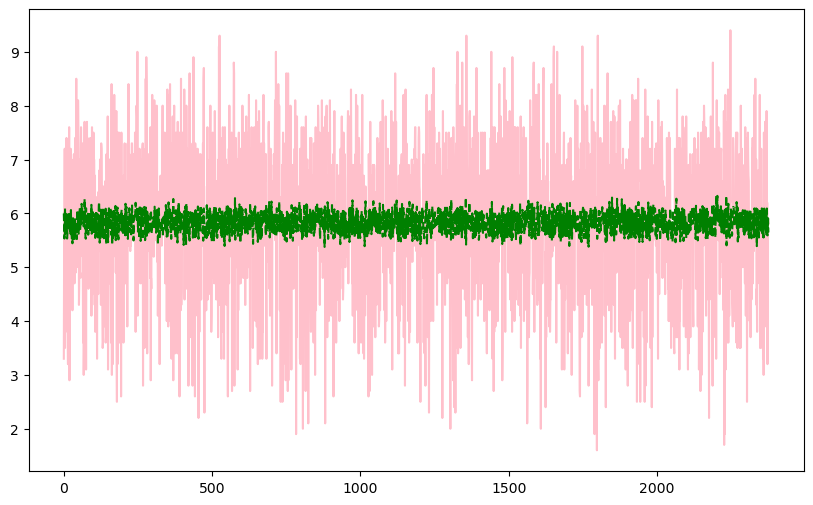

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

actual_rating=y_test
predicted=predictions
indices=np.arange(len(actual_rating))



plt.figure(figsize=(10,6))
plt.plot(indices,actual_rating,color='pink',label='Actual Rating',)
plt.plot(indices,predicted,color='green',label='Predicted',linestyle='dashed')

plt.show()